In [1]:
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve, auc, matthews_corrcoef, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fileList = ["ROC_targets_vs_preds_emb_Baseline_HN_26_nFilt_100_do_1_energy_False_separated_True.csv",
            "ROC_targets_vs_preds_emb_esm-1b_HN_64_nFilt_100_do_5_energy_True_separated_False.csv",
            "ROC_targets_vs_preds_emb_esm_ASM_HN_26_nFilt_200_do_1_energy_True_separated_False.csv",
            "ROC_targets_vs_preds_emb_esm-1b_HN_64_nFilt_100_do_5_energy_False_separated_True.csv",
            "ROC_targets_vs_preds_emb_esm_ASM_HN_26_nFilt_200_do_1_energy_False_separated_True.csv"]

modelName = ["Baseline", "ESM-1b (whole)", "ESM-MSA-1b (whole)", "ESM-1b (separated)", "ESM-MSA-1b (separated)"]


results = []
ACC_list = list()
AUC_list = list()
MCC_list = list()

for filename in fileList:
    with open(filename) as file:
        lines = file.readlines()
        lines = [line.strip("\n").replace("[","").replace("]","").split(",") for line in lines]
        lines.pop(0)
        for i in range (1,len(lines)):
            lines[i][0] = int(lines[i][0])
            lines[i][1] = float(lines[i][1])
        lines = pd.DataFrame(lines, columns=["Target", "Pred"]).astype(float)
        results.append(lines)

print(len(results))


5


In [10]:
#search for the best treshold

best_acc = list()
best_mcc = list()
best_rep = list()

for i in range(len(results)):
    print("file", i)
    
    all_acc = list()
    all_mcc = list()
    
    best_acc_val = -99999
    best_acc_rep = list()
    
    best_mcc_val = -99999
    best_mcc_rep = list()
    
    for t in np.arange(0, 1, 0.0001):
        
        results[i]['pred_bin'] = (results[i]["Pred"]>t).astype(int)
        y_target = results[i]['Target']
        y_pred = results[i]['pred_bin']
        m = matthews_corrcoef(y_target, y_pred)
        a = accuracy_score( y_target, y_pred )
        
        if a > best_acc_val:
            best_acc_val = a
            best_acc_rep = [t , a]
            
        if m > best_mcc_val:
            best_mcc_val = m
            best_mcc_rep = [t , m]
            
        all_acc.append(a)
        all_mcc.append(m)
        if t == 0.675:
            res = results[i]
      
        #print("t:", t , "- acc:", a, "- mcc:", m)
    print("treshold and acc", best_acc_rep )
    print("treshold and mcc", best_mcc_rep )
    best_rep.append( [best_acc_rep, best_mcc_rep] )
    best_acc.append(max(all_acc))
    best_mcc.append(max(all_mcc))
    print("----------------\n")


file 0


/Users/gulsudedemircan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/gulsudedemircan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/gulsudedemircan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/gulsudedemircan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/gulsudedemircan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered i

treshold and acc [0.674, 0.8616404308202155]
treshold and mcc [0.674, 0.6069203643575567]
----------------

file 1


/Users/gulsudedemircan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/gulsudedemircan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/gulsudedemircan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/gulsudedemircan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/gulsudedemircan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered i

treshold and acc [0.5917, 0.8649544324772163]
treshold and mcc [0.6614, 0.6135657471392089]
----------------

file 2


/Users/gulsudedemircan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/gulsudedemircan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/gulsudedemircan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/gulsudedemircan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/gulsudedemircan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered i

treshold and acc [0.6266, 0.8674399337199669]
treshold and mcc [0.6266, 0.6257686313808167]
----------------

file 3


/Users/gulsudedemircan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/gulsudedemircan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/gulsudedemircan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/gulsudedemircan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/gulsudedemircan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered i

treshold and acc [0.44370000000000004, 0.875724937862469]
treshold and mcc [0.44370000000000004, 0.6480714918136119]
----------------

file 4
treshold and acc [0.7156, 0.8591549295774648]
treshold and mcc [0.7156, 0.5971649669961488]
----------------



/Users/gulsudedemircan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/gulsudedemircan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/gulsudedemircan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/gulsudedemircan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/gulsudedemircan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered i

In [11]:
print("ACC")
for i in range(len(modelName)):
    print(modelName[i] , best_acc[i])


ACC
Baseline 0.8616404308202155
ESM-1b (whole) 0.8649544324772163
ESM-MSA-1b (whole) 0.8674399337199669
ESM-1b (separated) 0.875724937862469
ESM-MSA-1b (separated) 0.8591549295774648


In [12]:
print("MCC")
for i in range(len(modelName)):
    print(modelName[i] , best_mcc[i])


MCC
Baseline 0.6069203643575567
ESM-1b (whole) 0.6135657471392089
ESM-MSA-1b (whole) 0.6257686313808167
ESM-1b (separated) 0.6480714918136119
ESM-MSA-1b (separated) 0.5971649669961488


In [13]:
print("[[ acc_treshold, acc \t  ; mcc treshold, mcc ]]")
    
for z in range(len(best_rep)):
    print(best_rep[z])

[[ acc_treshold, acc 	  ; mcc treshold, mcc ]]
[[0.674, 0.8616404308202155], [0.674, 0.6069203643575567]]
[[0.5917, 0.8649544324772163], [0.6614, 0.6135657471392089]]
[[0.6266, 0.8674399337199669], [0.6266, 0.6257686313808167]]
[[0.44370000000000004, 0.875724937862469], [0.44370000000000004, 0.6480714918136119]]
[[0.7156, 0.8591549295774648], [0.7156, 0.5971649669961488]]


AUC model Baseline: 0.830
AUC model ESM-1b (whole): 0.883
AUC model ESM-MSA-1b (whole): 0.856
AUC model ESM-1b (separated): 0.884
AUC model ESM-MSA-1b (separated): 0.839


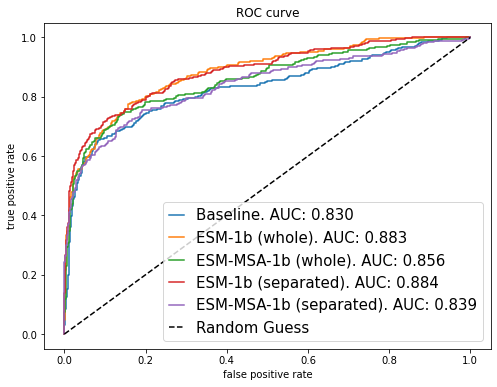

In [14]:
AUC_list = []
best_auc = list()
# For each model, a treshold value that gives the highest accuracy and mcc values is used in the calculation 
plt.figure(figsize=(8,6))

for i in range (len(results)):
    AUC_list.append( roc_auc_score( results[i]["Target"], results[i]["Pred"] ) )
    best_auc.append( roc_auc_score( results[i]["Target"], results[i]["Pred"] ) )
    
    fpr, tpr, thres = roc_curve(results[i]['Target'], results[i]['Pred'])
    print('AUC model {}: {:.3f}'.format(modelName[i], AUC_list[i]))

    # roc curve
    plt.plot(fpr, tpr, label="{}. AUC: {:.3f}".format(modelName[i], AUC_list[i]))
        
    
plt.plot([0,1],[0,1], "k--", label='Random Guess')    
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")

plt.savefig('plotROC.png')
plt.show()


In [15]:
AUC_list = best_auc
MCC_list = best_mcc
ACC_list = best_acc

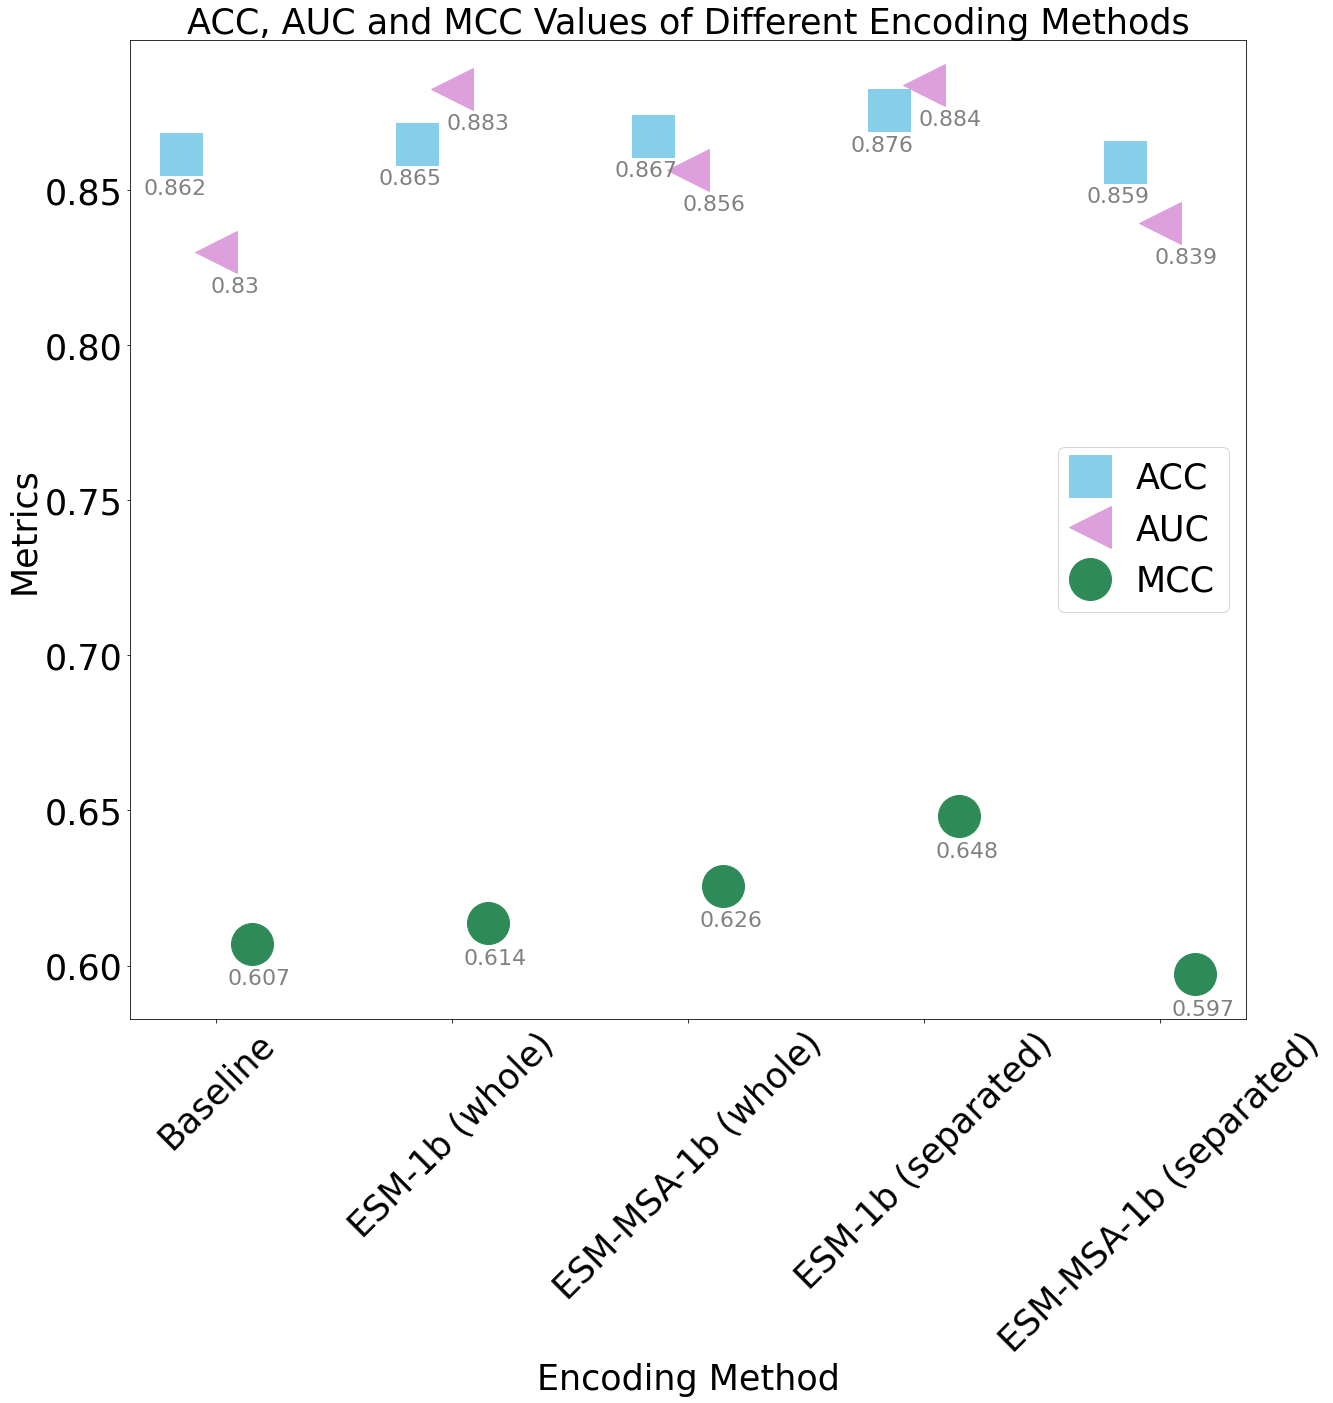

In [21]:
# plot data in grouped manner of bar type
params = {'legend.fontsize': 15,
          'legend.handlelength': 1}
plt.rcParams.update(params)

plt.rcParams["figure.figsize"] = (20,18)
x = np.arange(5)
width = 0.15
metrics_list = ['ACC', 'AUC', 'MCC']

plt.plot(x-0.15, ACC_list, "s", label="ACC".format("s"), markersize=42, color = "skyblue")


plt.plot(x, AUC_list, "<", label="AUC".format("<"), markersize=42, color = "plum")


plt.plot(x+0.15, MCC_list, "o", label="MCC".format("o"), markersize=42, color = "seagreen")

legend_list = ["Baseline", "ESM-1b (whole)", "ESM-MSA-1b (whole)", "ESM-1b (separated)", "ESM-MSA-1b (separated)"]

plt.xticks(x, legend_list, size=35, rotation=45)
plt.yticks(size=35)
plt.title("ACC, AUC and MCC Values of Different Encoding Methods", size=35)
plt.xlabel("Encoding Method", size=35)
plt.ylabel("Metrics", size=35)
plt.legend(metrics_list, fontsize= 35) #loc="upper right"

#lgnd = plt.legend(loc="upper right", numpoints=1, fontsize=30)

#change the marker size manually for both lines
#lgnd.legendHandles[0]._legmarker.set_markersize(17)
#lgnd.legendHandles[1]._legmarker.set_markersize(17)
#lgnd.legendHandles[2]._legmarker.set_markersize(17)



for t, m, text in zip(x, ACC_list, ACC_list):
    plt.text(t-0.31, m-0.013, round(text,3), fontsize=22, color="gray")

for t, m, text in zip(x, AUC_list, AUC_list):
    plt.text(t-0.025, m-0.013, round(text,3), fontsize=22, color="gray")


for t, m, text in zip(x, MCC_list, MCC_list):
    plt.text(t+0.05, m-0.013, round(text,3), fontsize=22, color="gray")

    
 
plt.savefig("ACC_AUC_MCC.svg", transparent=True, bbox_inches='tight')
plt.show()